# Tabla de contenido
1. [Introduccción al Proyecto](#Introduccción-al-Proyecto)
2. [Objetivos específicos](#Objetivos-específicos)
3. [Etapas de análisis del proyecto](#Etapas-de-análisis-del-proyecto)
4. [Acceso y preparación de datos](#Acceso-y-preparación-de-datos)
5. [Estudiar y comprobar los datos](#Estudiar-y-comprobar-los-datos)
6. [Estudiar el embudo de eventos](#Estudiar-el-embudo-de-eventos)
7. [Estudiar los resultados del experimento](#Estudiar-los-resultados-del-experimento)

# Introducción al Proyecto 
En este proyecto, trabajaremos para analizar el comportamiento de los usuarios en la aplicación de una empresa emergente dedicada a la venta de productos alimenticios. Dado el creciente interés por mejorar la experiencia del usuario y maximizar la conversión en la plataforma, este análisis se centrará en entender el recorrido del cliente a través del embudo de ventas y en evaluar el impacto de cambios de diseño mediante un test A/A/B. Esto nos permitirá identificar cuellos de botella en el embudo de ventas y evaluar si el cambio de fuente propuesto podría tener un impacto positivo o negativo en el comportamiento de los usuarios. Los resultados de este análisis orientarán decisiones estratégicas que mejorarán la eficiencia del embudo de ventas y optimizarán la experiencia de usuario en la aplicación.

# Objetivos específicos
**1.Estudiar el embudo de ventas:** Analizar el recorrido de los usuarios desde su ingreso a la plataforma hasta la etapa de compra, identificando puntos críticos donde se pierden usuarios.

**2.Evaluar la calidad de la segmentación en el test A/A/B:** Comprobar que los dos grupos de control (A/A) no presentan diferencias significativas para asegurar la validez del experimento.

**3.Determinar el impacto del cambio de fuente en el comportamiento del usuario:** Analizar si el nuevo diseño propuesto afecta los resultados clave en comparación con los grupos de control, basándonos en la actividad y la retención de usuarios en cada evento.

# Etapas de análisis del proyecto
**Paso 1:** Cargar y Examinar el Dataset
Abrir el archivo /datasets/logs_exp_us.csv y obtener una descripción general de los datos.
Renombrar las columnas para facilitar el análisis y verificar los tipos de datos y valores ausentes.
Agregar columnas que separen la fecha y hora para mejorar la segmentación temporal de los eventos.

**Paso 2:** Preparación de los Datos
Identificar y corregir problemas de calidad de datos, como tipos de datos incorrectos o valores nulos.
Crear nuevas columnas para gestionar la fecha y la hora, lo que facilitará el análisis temporal de eventos.

**Paso 3:** Exploración y Validación de los Datos
Calcular el número total de eventos y usuarios en el registro.
Analizar la distribución temporal de los datos para confirmar si la cobertura de eventos es uniforme en todo el periodo.
Verificar que los tres grupos experimentales (246, 247, 248) estén adecuadamente representados en el conjunto de datos.

**Paso 4:** Análisis del Embudo de Ventas
Identificar y ordenar los eventos registrados, calculando la frecuencia de cada uno.
Medir cuántos usuarios realizan cada acción y calcular la proporción de usuarios que completan cada etapa.
Construir un embudo de ventas que muestre el flujo de usuarios de una etapa a la siguiente, identificando dónde se produce la mayor pérdida.
Calcular el porcentaje de usuarios que completa el recorrido hasta la compra.

**Paso 5:** Análisis de los Resultados del Test A/A/B
Dividir a los usuarios en sus respectivos grupos (246, 247 y 248) y verificar la cantidad de usuarios en cada grupo.
Comparar los grupos de control (246 y 247) en cuanto a la cantidad de usuarios que completan el evento más común, verificando si existen diferencias estadísticamente significativas.
Repetir el análisis para otros eventos y confirmar si los grupos de control son consistentes entre sí.
Comparar el grupo experimental (248) con los controles en cada evento individualmente y de manera combinada para evaluar el impacto del cambio de fuente.
Establecer un nivel de significancia adecuado para las pruebas estadísticas, teniendo en cuenta la cantidad de hipótesis probadas, y recalcular si es necesario para asegurar conclusiones válidas.
Esta metodología permitirá evaluar detalladamente tanto el embudo de ventas como el impacto de las modificaciones en la aplicación, apoyando decisiones informadas para optimizar la experiencia del usuario y el rendimiento de la plataforma.

# Acceso y preparación de datos

**Inicialización**

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

**Cargar y explorar los datos**

In [4]:
data_empresa = pd.read_csv('./datasets/logs_exp_us.csv', sep='\t')

In [5]:
data_empresa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [6]:
data_empresa.head(10)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
5,CartScreenAppear,6217807653094995999,1564055323,248
6,OffersScreenAppear,8351860793733343758,1564066242,246
7,MainScreenAppear,5682100281902512875,1564085677,246
8,MainScreenAppear,1850981295691852772,1564086702,247
9,MainScreenAppear,5407636962369102641,1564112112,246


In [7]:
data_empresa.columns = data_empresa.columns.str.lower()

In [8]:
data_empresa.columns

Index(['eventname', 'deviceidhash', 'eventtimestamp', 'expid'], dtype='object')

In [9]:
data_empresa['eventtimestamp'] = pd.to_datetime(data_empresa['eventtimestamp'], unit = 's')

In [10]:
data_empresa['eventtimestamp']

0        2019-07-25 04:43:36
1        2019-07-25 11:11:42
2        2019-07-25 11:28:47
3        2019-07-25 11:28:47
4        2019-07-25 11:48:42
                 ...        
244121   2019-08-07 21:12:25
244122   2019-08-07 21:13:59
244123   2019-08-07 21:14:43
244124   2019-08-07 21:14:58
244125   2019-08-07 21:15:17
Name: eventtimestamp, Length: 244126, dtype: datetime64[ns]

In [11]:
data_empresa.dtypes

eventname                 object
deviceidhash               int64
eventtimestamp    datetime64[ns]
expid                      int64
dtype: object

In [12]:
data_empresa['eventtimestamp'].min()

Timestamp('2019-07-25 04:43:36')

In [13]:
data_empresa['eventtimestamp'].max()

Timestamp('2019-08-07 21:15:17')

In [14]:
data_empresa.duplicated().sum()

413

In [15]:
data_empresa = data_empresa.drop_duplicates()

In [16]:
data_empresa.duplicated().sum()

0

In [17]:
data_empresa.isna().sum()

eventname         0
deviceidhash      0
eventtimestamp    0
expid             0
dtype: int64

In [18]:
data_empresa['date_hr'] = data_empresa['eventtimestamp']

In [19]:
data_empresa['date_hr']

0        2019-07-25 04:43:36
1        2019-07-25 11:11:42
2        2019-07-25 11:28:47
3        2019-07-25 11:28:47
4        2019-07-25 11:48:42
                 ...        
244121   2019-08-07 21:12:25
244122   2019-08-07 21:13:59
244123   2019-08-07 21:14:43
244124   2019-08-07 21:14:58
244125   2019-08-07 21:15:17
Name: date_hr, Length: 243713, dtype: datetime64[ns]

In [20]:
data_empresa['date'] = data_empresa['eventtimestamp'].dt.date

In [21]:
data_empresa['date']

0         2019-07-25
1         2019-07-25
2         2019-07-25
3         2019-07-25
4         2019-07-25
             ...    
244121    2019-08-07
244122    2019-08-07
244123    2019-08-07
244124    2019-08-07
244125    2019-08-07
Name: date, Length: 243713, dtype: object

In [22]:
nombre_eventos = data_empresa['eventname'].unique()

In [23]:
nombre_eventos

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

# Estudiar y comprobar los datos

**¿Cuántos eventos hay en los registros?**

In [24]:
num_eventos = data_empresa['date'].count()

In [25]:
num_eventos

243713

**¿Cuántos usuarios y usuarias hay en los registros?**

In [26]:
num_usuarios = data_empresa['deviceidhash'].nunique()

In [27]:
num_usuarios

7551

**¿Cuál es el promedio de eventos por usuario?**

In [28]:
promedio_eventos_usuario = data_empresa.groupby('date')['deviceidhash'].nunique().sort_index()

In [29]:
promedio_eventos_usuario

date
2019-07-25       7
2019-07-26      22
2019-07-27      39
2019-07-28      69
2019-07-29     135
2019-07-30     296
2019-07-31     924
2019-08-01    3703
2019-08-02    3647
2019-08-03    3482
2019-08-04    3527
2019-08-05    3802
2019-08-06    3922
2019-08-07    3651
Name: deviceidhash, dtype: int64

In [30]:
promedio_eventos_usuario.mean()

1944.7142857142858

**¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima.**

In [31]:
data_empresa['date'].min()

datetime.date(2019, 7, 25)

In [32]:
data_empresa['date'].max()

datetime.date(2019, 8, 7)

**Traza un histograma por fecha y hora. ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo?** 

In [33]:
eventos_fecha_hr = data_empresa.groupby('date_hr')['deviceidhash'].nunique().sort_index()

In [34]:
eventos_fecha_hr

date_hr
2019-07-25 04:43:36    1
2019-07-25 11:11:42    1
2019-07-25 11:28:47    1
2019-07-25 11:48:42    1
2019-07-25 11:48:43    1
                      ..
2019-08-07 21:12:25    1
2019-08-07 21:13:59    1
2019-08-07 21:14:43    1
2019-08-07 21:14:58    1
2019-08-07 21:15:17    1
Name: deviceidhash, Length: 176654, dtype: int64

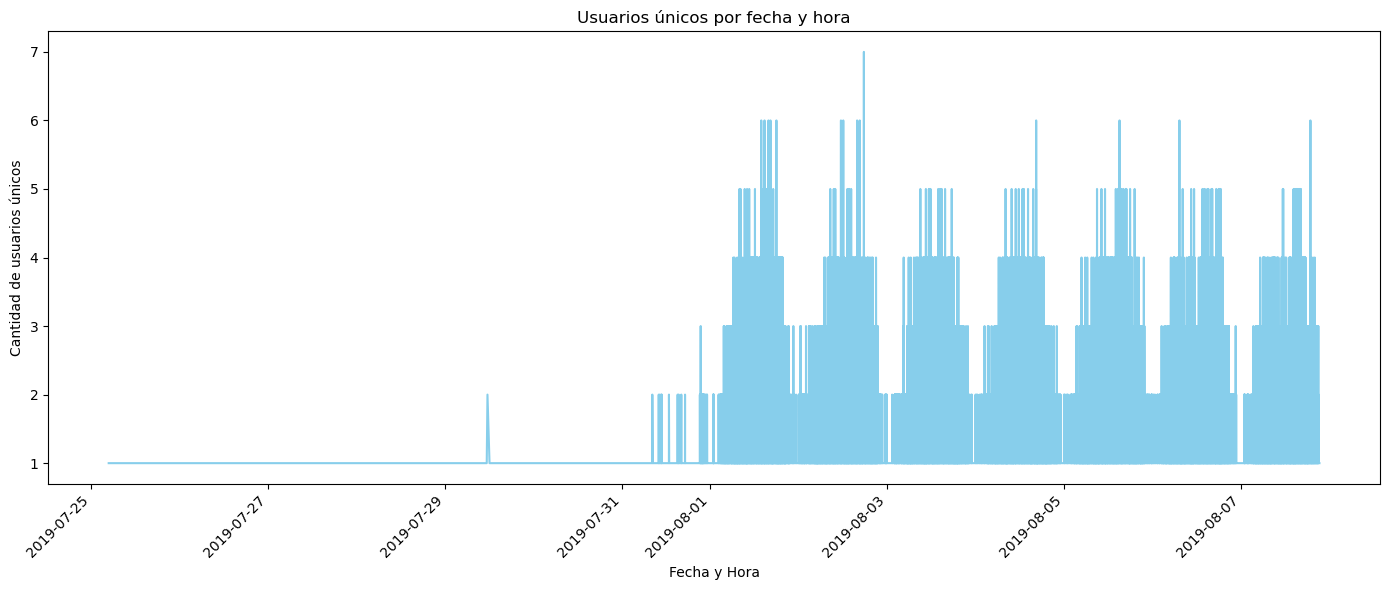

In [35]:
plt.figure(figsize=(14, 6))
eventos_fecha_hr.plot(kind='line', color='skyblue')
plt.title('Usuarios únicos por fecha y hora')
plt.xlabel('Fecha y Hora')
plt.ylabel('Cantidad de usuarios únicos')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()


**Los eventos más antiguos podrían terminar en los registros de algunos usuarios o usuarias por razones técnicas y esto podría sesgar el panorama general. Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. ¿Qué periodo representan realmente los datos?**

Los datos comienzan a estar completos a partir del 1-0-8-2019 al 7-08-2019

In [36]:
filtro_fecha = (data_empresa['eventtimestamp'] >= '2019-08-01') & (data_empresa['eventtimestamp'] <= '2019-08-08')

In [37]:
data_empresa = data_empresa[filtro_fecha]

In [38]:
data_empresa['date'].min()

datetime.date(2019, 8, 1)

In [39]:
data_empresa['date'].max()

datetime.date(2019, 8, 7)

**Asegúrate de tener usuarios y usuarias de los tres grupos experimentales.**

In [40]:
usuarios_por_grupo = data_empresa.groupby('expid')['deviceidhash'].nunique()

In [41]:
usuarios_por_grupo.head()

expid
246    2484
247    2513
248    2537
Name: deviceidhash, dtype: int64

**Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.**

In [42]:
eventos_frecuencia = data_empresa['eventname'].value_counts()

In [43]:
eventos_frecuencia

eventname
MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: count, dtype: int64

**Encuentra la cantidad de usuarios y usuarias que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios y usuarias. Calcula la proporción de usuarios y usuarias que realizaron la acción al menos una vez.**

In [44]:
usuarios_por_evento = data_empresa.groupby('eventname')['deviceidhash'].nunique().sort_values(ascending=False)

In [45]:
usuarios_por_evento

eventname
MainScreenAppear           7419
OffersScreenAppear         4593
CartScreenAppear           3734
PaymentScreenSuccessful    3539
Tutorial                    840
Name: deviceidhash, dtype: int64

In [46]:
proporcion_usuarios_por_evento = usuarios_por_evento/num_usuarios

In [47]:
proporcion_usuarios_por_evento

eventname
MainScreenAppear           0.982519
OffersScreenAppear         0.608264
CartScreenAppear           0.494504
PaymentScreenSuccessful    0.468680
Tutorial                   0.111244
Name: deviceidhash, dtype: float64

**¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.**

Basándome en las proporciones de usuarios que realizaron cada evento, podemos suponer el siguiente orden de las acciones como una secuencia lógica en la aplicación:

1. **MainScreenAppear** (98.2%): La mayoría de los usuarios ven la pantalla principal, lo que tiene sentido como primer paso en la secuencia.
2. **OffersScreenAppear** (60.8%): Después de ver la pantalla principal, muchos usuarios probablemente acceden a ofertas.
3. **CartScreenAppear** (49.4%): Una vez que ven ofertas, algunos usuarios colocan artículos en el carrito, lo que se refleja en la aparición de la pantalla del carrito.
4. **PaymentScreenSuccessful** (46.9%): Tras añadir artículos al carrito, una parte realiza con éxito el pago.
5. **Tutorial** (11.2%): La baja proporción sugiere que el tutorial puede ser opcional o dirigido a nuevos usuarios.

Estos eventos forman una secuencia lógica de navegación de usuarios hacia la compra en la aplicación, aunque no necesariamente todos los usuarios siguen el flujo completo. También es posible que el **Tutorial** no sea un paso obligatorio en el embudo de conversión, lo que explicaría su baja participación.

**Utiliza el embudo de eventos para encontrar la proporción de usuarios y usuarias que pasan de una etapa a la siguiente. (Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B).**

In [48]:
usuarios_evento = data_empresa.groupby('eventname')['deviceidhash'].nunique().loc[
    ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
]

In [49]:
usuarios_evento

eventname
MainScreenAppear           7419
OffersScreenAppear         4593
CartScreenAppear           3734
PaymentScreenSuccessful    3539
Name: deviceidhash, dtype: int64

In [50]:
conversion_a_ofertas = usuarios_evento['OffersScreenAppear'] / usuarios_evento['MainScreenAppear']
conversion_a_carrito = usuarios_evento['CartScreenAppear'] / usuarios_evento['OffersScreenAppear']
conversion_a_pago = usuarios_evento['PaymentScreenSuccessful'] / usuarios_evento['CartScreenAppear']

In [51]:
print("Proporción de usuarios que pasaron de MainScreenAppear a OffersScreenAppear:", conversion_a_ofertas)
print("Proporción de usuarios que pasaron de OffersScreenAppear a CartScreenAppear:", conversion_a_carrito)
print("Proporción de usuarios que pasaron de CartScreenAppear a PaymentScreenSuccessful:", conversion_a_pago)

Proporción de usuarios que pasaron de MainScreenAppear a OffersScreenAppear: 0.6190861302062273
Proporción de usuarios que pasaron de OffersScreenAppear a CartScreenAppear: 0.8129762682342695
Proporción de usuarios que pasaron de CartScreenAppear a PaymentScreenSuccessful: 0.9477771826459561


**¿En qué etapa pierdes más usuarios y usuarias?**

La etapa con la menor proporción de conversión fue la de usuarios que pasaron de MainScreenAppear a OffersScreenAppear que  representa la mayor pérdida de usuarios.

**¿Qué porcentaje de usuarios y usuarias hace todo el viaje desde su primer evento hasta el pago?**

In [52]:
conversion_total = usuarios_por_evento['PaymentScreenSuccessful'] / usuarios_por_evento['MainScreenAppear']

In [53]:
print("Proporción de usuarios que completan todo el embudo:", conversion_total)

Proporción de usuarios que completan todo el embudo: 0.47701846610055265


Este valor final nos indica el porcentaje de usuarios que realizaron el viaje completo desde la pantalla principal hasta el pago exitoso.

# Estudiar los resultados del experimento

**¿Cuántos usuarios y usuarias hay en cada grupo?**

In [54]:
usuarios_por_grupo = data_empresa.groupby('expid')['deviceidhash'].nunique()

In [55]:
usuarios_por_grupo

expid
246    2484
247    2513
248    2537
Name: deviceidhash, dtype: int64

**Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.**

In [56]:
# Filtramos los datos para los dos grupos de control
grupo_246 = data_empresa[data_empresa['expid'] == 246]
grupo_247 = data_empresa[data_empresa['expid'] == 247]

In [57]:
# Calculamos la cantidad total de usuarios en cada grupo
total_usuarios_246 = data_empresa[data_empresa['expid'] == 246]['deviceidhash'].nunique()
total_usuarios_247 = data_empresa[data_empresa['expid'] == 247]['deviceidhash'].nunique()

In [58]:
total_usuarios_246

2484

In [59]:
total_usuarios_247

2513

In [60]:
# Calculamos la cantidad de usuarios que llegaron a "PaymentScreenSuccessful" en cada grupo
usuarios_conversion_246 = grupo_246[grupo_246['eventname'] == 'PaymentScreenSuccessful']['deviceidhash'].nunique()
usuarios_conversion_247 = grupo_247[grupo_247['eventname'] == 'PaymentScreenSuccessful']['deviceidhash'].nunique()

In [61]:
# Calculamos la tasa de conversión en cada grupo
tasa_conversion_246 = usuarios_conversion_246 / total_usuarios_246

In [62]:
tasa_conversion_247 = usuarios_conversion_247 / total_usuarios_247

In [63]:
print("Tasa de conversión en el grupo 246:", tasa_conversion_246)

Tasa de conversión en el grupo 246: 0.4830917874396135


In [64]:
print("Tasa de conversión en el grupo 247:", tasa_conversion_247)

Tasa de conversión en el grupo 247: 0.46080382013529647


In [65]:
conteos_conversion = [usuarios_conversion_246, usuarios_conversion_247]
totales = [total_usuarios_246, total_usuarios_247]

In [66]:
stat, p_value = proportions_ztest(conteos_conversion, totales)

In [67]:
print("Estadístico de prueba z:", stat)
print("Valor p:", p_value)

Estadístico de prueba z: 1.5779948491596598
Valor p: 0.11456679313141847


**Observación**: El valor p es mayor que 0.05, entonces no hay suficiente evidencia para decir que las tasas de conversión difieren significativamente entre los dos grupos de control. Esto indicaría que nuestros grupos de control están alineados y que los resultados de nuestras pruebas son confiables.

**Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios y usuarias que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa.**

In [68]:
# Contar la frecuencia de cada evento
evento_mas_popular = data_empresa['eventname'].value_counts().idxmax()

In [69]:
print(f"El evento más popular es: {evento_mas_popular}")

El evento más popular es: MainScreenAppear


In [70]:
# Calculamos la cantidad de usuarios que llegaron a "MainScreenAppear" en cada grupo
usuarios_conversion_246 = grupo_246[grupo_246['eventname'] == 'MainScreenAppear']['deviceidhash'].nunique()
usuarios_conversion_247 = grupo_247[grupo_247['eventname'] == 'MainScreenAppear']['deviceidhash'].nunique()

In [71]:
# Calculamos la tasa de conversión en cada grupo
tasa_conversion_246 = usuarios_conversion_246 / total_usuarios_246

In [72]:
tasa_conversion_247 = usuarios_conversion_247 / total_usuarios_247

In [73]:
print("Tasa de conversión en el grupo 246:", tasa_conversion_246)

Tasa de conversión en el grupo 246: 0.9863123993558777


In [74]:
print("Tasa de conversión en el grupo 247:", tasa_conversion_247)

Tasa de conversión en el grupo 247: 0.9852765618782332


In [75]:
conteos_conversion = [usuarios_conversion_246, usuarios_conversion_247]
totales = [total_usuarios_246, total_usuarios_247]

In [76]:
stat, p_value = proportions_ztest(conteos_conversion, totales)

In [77]:
print("Estadístico de prueba z:", stat)
print("Valor p:", p_value)

Estadístico de prueba z: 0.3093441851418436
Valor p: 0.7570597232046099


**Observación**: El valor p es mayor que 0.05, entonces no hay suficiente evidencia para decir que las tasas de conversión difieren significativamente entre los dos grupos de control. Esto indicaría que nuestros grupos de control están alineados y que los resultados de nuestras pruebas son confiables.

**Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?**

In [78]:
# Función para comparar proporciones entre los grupos de control
def comparar_proporciones(evento): 
    # Filtrar usuarios únicos que realizaron el evento en cada grupo de control
    usuarios_control_246 = data_empresa[(data_empresa['eventname'] == evento) & (data_empresa['expid'] == 246)]['deviceidhash'].nunique()
    usuarios_control_247 = data_empresa[(data_empresa['eventname'] == evento) & (data_empresa['expid'] == 247)]['deviceidhash'].nunique()
    # Calcular el total de usuarios únicos en cada grupo de control
    total_usuarios_246 = data_empresa[data_empresa['expid'] == 246]['deviceidhash'].nunique()
    total_usuarios_247 = data_empresa[data_empresa['expid'] == 247]['deviceidhash'].nunique()
     # Preparar los datos para la prueba de proporciones
    conteos_conversion = [usuarios_control_246, usuarios_control_247]
    totales = [total_usuarios_246, total_usuarios_247]
    # Realizar la prueba de proporciones
    stat, p_value = proportions_ztest(conteos_conversion, totales)
    # Resultados
    print(f"Evento: {evento}")
    print(f"Usuarios grupo 246: {usuarios_control_246}, Usuarios grupo 247: {usuarios_control_247}")
    print(f"Proporción grupo 246: {usuarios_control_246 / total_usuarios_246:.4f}, Proporción grupo 247: {usuarios_control_247 / total_usuarios_247:.4f}")
    print(f"Estadístico z: {stat:.4f}, Valor p: {p_value:.4f}\n")
    # Obtener todos los eventos únicos en el dataset
eventos_unicos = data_empresa['eventname'].unique()

# Aplicar la función a cada evento
for evento in eventos_unicos:
    comparar_proporciones(evento)

Evento: Tutorial
Usuarios grupo 246: 278, Usuarios grupo 247: 283
Proporción grupo 246: 0.1119, Proporción grupo 247: 0.1126
Estadístico z: -0.0782, Valor p: 0.9377

Evento: MainScreenAppear
Usuarios grupo 246: 2450, Usuarios grupo 247: 2476
Proporción grupo 246: 0.9863, Proporción grupo 247: 0.9853
Estadístico z: 0.3093, Valor p: 0.7571

Evento: OffersScreenAppear
Usuarios grupo 246: 1542, Usuarios grupo 247: 1520
Proporción grupo 246: 0.6208, Proporción grupo 247: 0.6049
Estadístico z: 1.1550, Valor p: 0.2481

Evento: CartScreenAppear
Usuarios grupo 246: 1266, Usuarios grupo 247: 1238
Proporción grupo 246: 0.5097, Proporción grupo 247: 0.4926
Estadístico z: 1.2034, Valor p: 0.2288

Evento: PaymentScreenSuccessful
Usuarios grupo 246: 1200, Usuarios grupo 247: 1158
Proporción grupo 246: 0.4831, Proporción grupo 247: 0.4608
Estadístico z: 1.5780, Valor p: 0.1146



**Observaciones:** Los resultados de las pruebas estadísticas indican que no hay diferencias estadísticamente significativas entre los grupos de control (246 y 247) para ninguno de los eventos, ya que todos los valores p son mayores que 0.05. Esto sugiere que ambos grupos se comportan de manera similar y que no hay sesgo en la asignación de los usuarios a los grupos de control. La ausencia de diferencias significativas para todos los eventos sugiere que los grupos de control están bien balanceados. Esto es una señal positiva, ya que indica que los mecanismos de división y aleatorización han funcionado correctamente, y los grupos de control pueden ser comparables al realizar el análisis en el experimento A/B/A.los valores p altos confirman que las proporciones son equivalentes entre los grupos para todos los eventos, lo cual valida la configuración del experimento.

**Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?**

In [79]:
# Calcular el número de usuarios únicos que realizaron cada evento en cada grupo
# Filtra los datos para cada grupo
grupo_246 = data_empresa[data_empresa['expid'] == 246]
grupo_247 = data_empresa[data_empresa['expid'] == 247]
grupo_248 = data_empresa[data_empresa['expid'] == 248]

In [80]:
# Contar usuarios únicos por evento en cada grupo
usuarios_evento_246 = grupo_246.groupby('eventname')['deviceidhash'].nunique()
usuarios_evento_247 = grupo_247.groupby('eventname')['deviceidhash'].nunique()
usuarios_evento_248 = grupo_248.groupby('eventname')['deviceidhash'].nunique()

In [81]:
# Obtener la cantidad total de usuarios únicos en cada grupo
total_usuarios_246 = grupo_246['deviceidhash'].nunique()
total_usuarios_247 = grupo_247['deviceidhash'].nunique()
total_usuarios_248 = grupo_248['deviceidhash'].nunique()

In [82]:
# Definir una función para comparar proporciones entre el grupo de prueba y cada grupo de control
def comparar_proporciones(evento, usuarios_evento_control, total_control, usuarios_evento_prueba, total_prueba):
    # Contar el número de usuarios que hicieron el evento en cada grupo
    conteos = [usuarios_evento_control, usuarios_evento_prueba]
    totales = [total_control, total_prueba]
    
    # Realizar la prueba z para proporciones
    stat, p_value = proportions_ztest(conteos, totales)
    return stat, p_value
    # Crear un DataFrame para almacenar los resultados
resultados = []
# Comparar cada evento entre los grupos de control y el grupo de prueba
for evento in usuarios_evento_246.index:
    # Comparación con grupo 246
    stat_246, p_value_246 = comparar_proporciones(
        evento,
        usuarios_evento_246.get(evento, 0),
        total_usuarios_246,
        usuarios_evento_248.get(evento, 0),
        total_usuarios_248
    )
    # Comparación con grupo 247
    stat_247, p_value_247 = comparar_proporciones(
        evento,
        usuarios_evento_247.get(evento, 0),
        total_usuarios_247,
        usuarios_evento_248.get(evento, 0),
        total_usuarios_248
    )
    # Comparación con la media combinada de los grupos de control
    usuarios_evento_control_comb = (usuarios_evento_246.get(evento, 0) + usuarios_evento_247.get(evento, 0)) / 2
    total_control_comb = (total_usuarios_246 + total_usuarios_247) / 2
    
    stat_comb, p_value_comb = comparar_proporciones(
        evento,
        usuarios_evento_control_comb,
        total_control_comb,
        usuarios_evento_248.get(evento, 0),
        total_usuarios_248
    )
    # Agregar los resultados al DataFrame
    resultados.append({
        'Evento': evento,
        'Estadístico z (vs Grupo 246)': stat_246,
        'Valor p (vs Grupo 246)': p_value_246,
        'Estadístico z (vs Grupo 247)': stat_247,
        'Valor p (vs Grupo 247)': p_value_247,
        'Estadístico z (vs Control Combinado)': stat_comb,
        'Valor p (vs Control Combinado)': p_value_comb,
    })
# Convertir los resultados en un DataFrame
df_resultados = pd.DataFrame(resultados)

# Mostrar los resultados
print(df_resultados)

                    Evento  Estadístico z (vs Grupo 246)  \
0         CartScreenAppear                      1.759874   
1         MainScreenAppear                      1.047276   
2       OffersScreenAppear                      1.258082   
3  PaymentScreenSuccessful                      1.247388   
4                 Tutorial                      0.219283   

   Valor p (vs Grupo 246)  Estadístico z (vs Grupo 247)  \
0                0.078429                      0.555402   
1                0.294972                      0.740980   
2                0.208362                      0.100709   
3                0.212255                     -0.335376   
4                0.826429                      0.298497   

   Valor p (vs Grupo 247)  Estadístico z (vs Control Combinado)  \
0                0.578620                              1.155053   
1                0.458705                              0.892239   
2                0.919782                              0.675828   
3               

**Observaciones:** 
Para interpretar estos resultados, vamos a revisar el valor p de cada evento en la comparación entre el grupo de prueba (grupo 248) y los grupos de control (grupos 246 y 247), así como el control combinado.

Interpretación clave del valor p:<br>
Si el valor p es menor a 0.05, se considera que hay una diferencia estadísticamente significativa en el evento entre los grupos.<br>                       Si el valor p es mayor o igual a 0.05, no hay evidencia de una diferencia significativa.

**CartScreenAppear:**<br>
Comparación con grupo 246: Estadístico z = 1.759874 , Valor p = 0.078429<br>
Comparación con grupo 247: Estadístico z = 0.555402 , Valor p = 0.578620<br>
Comparación con el control combinado: Estadístico z =  1.155053, Valor p =  0.248069<br>
Interpretación: Ninguna de estas comparaciones muestra un valor p menor a 0.05. Esto sugiere que la frecuencia del evento "CartScreenAppear" no es significativamente diferente en el grupo de prueba en comparación con los grupos de control.

**MainScreenAppear:**<br>

Comparación con grupo 246: Estadístico z =1.047276  , Valor p =0.294972  <br>
Comparación con grupo 247: Estadístico z = 0.740980 , Valor p =  0.458705  <br>
Comparación con el control combinado: Estadístico z = 0.892239 , Valor p = 0.372265<br>
Interpretación: Tampoco se observa diferencia significativa aquí, ya que todos los valores p son mayores que 0.05. Esto indica que el evento "MainScreenAppear" es consistente entre el grupo de prueba y los grupos de control.

**OffersScreenAppear:**<br>

Comparación con grupo 246: Estadístico z = 1.258082 , Valor p = 0.208362 <br>
Comparación con grupo 247: Estadístico z = 0.100709 , Valor p = 0.919782 <br>
Comparación con el control combinado: Estadístico z = 0.675828, Valor p = 0.499150 <br>
Interpretación: Nuevamente, no hay diferencias significativas en "OffersScreenAppear" entre el grupo de prueba y los grupos de control.

**PaymentScreenSuccessful:**<br>

Comparación con grupo 246: Estadístico z = 1.247388 , Valor p = 0.212255 <br>
Comparación con grupo 247: Estadístico z =-0.335376  , Valor p =  0.737342 <br>
Comparación con el control combinado: Estadístico z =  0.453091, Valor p =  0.650483<br>
Interpretación: No se encuentra diferencia estadísticamente significativa para el evento "PaymentScreenSuccessful".

**Tutorial:**<br>

Comparación con grupo 246: Estadístico z =  0.219283, Valor p = 0.826429<br>
Comparación con grupo 247: Estadístico z = 0.298497, Valor p = 0.765324 <br>
Comparación con el control combinado: Estadístico z = 0.259089, Valor p = 0.795566<br>
Interpretación: Los valores p en todos los casos son muy altos, indicando que no hay diferencia significativa en el evento "Tutorial" entre el grupo de prueba y los grupos de control.

**Conclusión**<br>
En todas las comparaciones, los valores p son mayores a 0.05, lo que indica que no hay diferencias estadísticamente significativas entre el grupo de prueba (248) y los grupos de control (246 y 247), tanto individualmente como en combinación, para ninguno de los eventos. Esto sugiere que los grupos de control y el grupo de prueba probablemente están correctamente equilibrados, y que el cambio en las fuentes (fuentes alteradas en el grupo de prueba) no tuvo un impacto significativo en el comportamiento de los usuarios en estos eventos.



**¿Qué nivel de significación has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significación? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones.**

Con un nivel de significancia de 0.05, cada prueba de hipótesis tiene una probabilidad de 5% de arrojar un falso positivo, es decir, de encontrar una diferencia estadísticamente significativa cuando en realidad no la hay.<br> 
Cantidad de pruebas realizadas: Basándonos en los datos, se realizaron 15 pruebas (cinco eventos por cada una de las comparaciones entre el grupo de prueba y los grupos de control: Grupo 246, Grupo 247 y Control Combinado).<br>
Proporción de falsos positivos con un nivel de 0.05: Dado que se realizaron 15 pruebas y si usamos un nivel de significancia de 0.05, aproximadamente uno de cada 20 resultados podría ser falso positivo. Así, podríamos esperar alrededor de 15×0.05=0.75 falsos positivos solo por el número de pruebas realizadas.
Nivel de significancia recomendado: Para reducir el riesgo de falsos positivos, podríamos considerar reducir el nivel de significancia. Aplicando la corrección de Bonferroni, dividiríamos 0.05 entre 15, lo que resulta en un nuevo nivel de significancia de aproximadamente 0.0033 para cada prueba individual.